# 实验：车道线检测

## 一、实验内容
基于机器视觉对交通车道线进行实时检测，应用全卷积神经网络对车道线进行识别和定位，并对车道线识别结果进行可视化。

## 二、实验目标
1. 了解全卷积神经网络基本原理
2. 熟悉车道线检测的常规流程
3. 掌握车道线检测模型的使用方法


## 三、实验过程


### 3.1 模型训练

首先导入需要的组件包，Numpy、keras、sklearn等，代码如下：

In [10]:
import numpy as np
import pickle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Import necessary items from Keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, UpSampling2D
from keras.layers import Conv2DTranspose, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

#### 1)模型结构定义
网络输入层为80 x 160 x 3（RGB）形状的道路图像，标签为80 x 160 x 1，只有G通道重新绘制车道，实现代码如下：

In [11]:
def create_model(input_shape, pool_size):
    # 创建网络模型
    model = Sequential()
    # 对输入层进行归一化处理
    model.add(BatchNormalization(input_shape=input_shape))

    # 卷积层1，名为Conv1
    model.add(Conv2D(8, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv1'))

    # 卷积层2
    model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2'))

    # 最大化层
    model.add(MaxPooling2D(pool_size=pool_size))

    # 卷积层3
    model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv3'))
    model.add(Dropout(0.2))

    # 卷积层4
    model.add(Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv4'))
    model.add(Dropout(0.2))

    # 卷积层5
    model.add(Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv5'))
    model.add(Dropout(0.2))

    # 最大化层2
    model.add(MaxPooling2D(pool_size=pool_size))

    # 卷积层6
    model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv6'))
    model.add(Dropout(0.2))

    # 卷积层7
    model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv7'))
    model.add(Dropout(0.2))

    # 最大化层3
    model.add(MaxPooling2D(pool_size=pool_size))

    # 上采样层1
    model.add(UpSampling2D(size=pool_size))

    # 反卷积层 1
    model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv1'))
    model.add(Dropout(0.2))

    # 反卷积层 2
    model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv2'))
    model.add(Dropout(0.2))

    # 上采样层 2
    model.add(UpSampling2D(size=pool_size))

    # 反卷积层 3
    model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv3'))
    model.add(Dropout(0.2))

    # 反卷积层 4
    model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv4'))
    model.add(Dropout(0.2))

    # 反卷积层 5
    model.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv5'))
    model.add(Dropout(0.2))

    # 上采样层 3
    model.add(UpSampling2D(size=pool_size))

    # 反卷积层 6
    model.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv6'))

    # 输出层
    model.add(Conv2DTranspose(1, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Final'))

    return model

#### 2）加载数据

In [12]:
# 加载训练数据
train_images = pickle.load(open("full_CNN_train.p", "rb" ))

# 加载标签数据
labels = pickle.load(open("full_CNN_labels.p", "rb" ))

# 对数据进行预处理
train_images = np.array(train_images)
labels = np.array(labels)

flatten = labels.reshape(-1)
print(set(flatten.tolist()))

# 对标签进行归一化处理
labels = labels / 255

# 混淆数据
train_images, labels = shuffle(train_images, labels)
# 划分训练集和测试集
X_train, X_val, y_train, y_val = train_test_split(train_images, labels, test_size=0.1)

print("loaded train samples:", len(train_images))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

#### 3）构建并编译模型

In [13]:
# 定义超参
#批大小
batch_size = 128
#训练回合数
epochs = 10
#池化大小
pool_size = (2, 2)
#输入大小
input_shape = X_train.shape[1:]

# 构建模型
model = create_model(input_shape, pool_size)

# 构建数据生成器实现通道增强
datagen = ImageDataGenerator(channel_shift_range=0.2)
datagen.fit(X_train)

# 编译模型
model.compile(optimizer='Adam', loss='mean_squared_error')
# 可视化模型
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 80, 160, 3)        12        
 Normalization)                                                  
                                                                 
 Conv1 (Conv2D)              (None, 78, 158, 8)        224       
                                                                 
 Conv2 (Conv2D)              (None, 76, 156, 16)       1168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 38, 78, 16)        0         
 D)                                                              
                                                                 
 Conv3 (Conv2D)              (None, 36, 76, 16)        2320      
                                                                 
 dropout (Dropout)           (None, 36, 76, 16)        0

#### 4)训练模型

In [14]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size), steps_per_epoch=len(X_train)/batch_size,
epochs=epochs, verbose=1, validation_data=(X_val, y_val))

Epoch 1/10


/var/folders/zm/2qblkjpd17j1wbw32rvn1_fr0000gn/T/ipykernel_74080/2684464225.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size), steps_per_epoch=len(X_train)/batch_size,


89/89 [==============================] - 93s 1s/step - loss: 0.0672 - val_loss: 0.0362
Epoch 2/10
89/89 [==============================] - 92s 1s/step - loss: 0.0188 - val_loss: 0.0148
Epoch 3/10
89/89 [==============================] - 92s 1s/step - loss: 0.0129 - val_loss: 0.0109
Epoch 4/10
89/89 [==============================] - 91s 1s/step - loss: 0.0108 - val_loss: 0.0093
Epoch 5/10
89/89 [==============================] - 94s 1s/step - loss: 0.0097 - val_loss: 0.0089
Epoch 6/10
89/89 [==============================] - 96s 1s/step - loss: 0.0090 - val_loss: 0.0083
Epoch 7/10
89/89 [==============================] - 98s 1s/step - loss: 0.0086 - val_loss: 0.0081
Epoch 8/10
89/89 [==============================] - 99s 1s/step - loss: 0.0083 - val_loss: 0.0079
Epoch 9/10
89/89 [==============================] - 99s 1s/step - loss: 0.0077 - val_loss: 0.0066
Epoch 10/10
89/89 [==============================] - 98s 1s/step - loss: 0.0070 - val_loss: 0.0061


#### 5)保存模型

In [15]:
# Freeze layers since training is done
model.trainable = False
model.compile(optimizer='Adam', loss='mean_squared_error')

# Save model architecture and weights
model.save('full_CNN_model_tiny.h5')


/opt/homebrew/Caskroom/miniforge/base/envs/my_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 3.2 加载并使用模型

#### 1） 加载Python相关组件

In [16]:
import numpy
import numpy as np
import cv2
from PIL.Image import Image
from keras.models import load_model
from IPython.display import clear_output, Image, display, HTML



#### 2）定义工具类

In [17]:
# 道路线类
class Lanes():
    def __init__(self):
        self.recent_fit = []
        self.avg_fit = []

In [18]:
#图像显示方法
def arrayShow(imageArray):
    ret, jpg = cv2.imencode('.jpg', imageArray)
    return Image(jpg)

#### 3）加载检测模型

In [19]:
# 加载模型
model = load_model('full_CNN_model.h5')

#### 4）读取视频文件和输出检测结果

读取input目录下的demo.mp4文件，逐帧读取并交给模型进行检测和识别，然后对检测结果计算其均值，并将检测结果绘制输出。

代码如下：

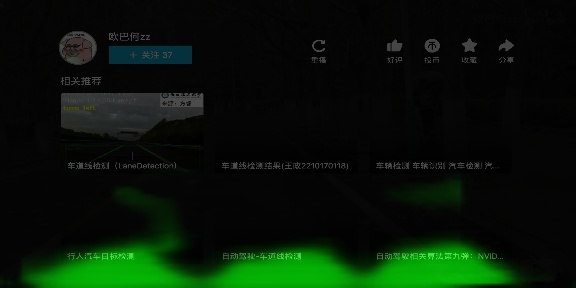

[INFO] cleaning up...


In [20]:
#读取视频文件
vs = cv2.VideoCapture("input/demo1.mp4")

frameIndex = 0

lanes = Lanes()

#循环读取
while True:
    #读取视频帧
    (grabbed, frame_source) = vs.read()
    if not grabbed:
        break
    
    #将视频帧resize为模型的输入大小
    frame_show = cv2.resize(frame_source, (576, 288))
    frame = cv2.resize(frame_show, (160, 80))


    rgb_small_frame = frame[None,:,:,:]

   
    # 模型推理检测
    prediction = model.predict(rgb_small_frame)[0] * 255

    # 储存预测结果到列表中
    lanes.recent_fit.append(prediction)
    # 只使用最近的数据
    if len(lanes.recent_fit) > 5:
        lanes.recent_fit = lanes.recent_fit[1:]

    # 计算平均预测结果
    lanes.avg_fit = np.mean(np.array([i for i in lanes.recent_fit]), axis = 0)

    # Generate fake R & B color dimensions, stack with G
    blanks = np.zeros_like(lanes.avg_fit).astype(np.uint8)
    lane_drawn = np.dstack((blanks, lanes.avg_fit, blanks))
    
    #恢复成原始视频大小
    lane_image = cv2.resize(lane_drawn, (576, 288))

    #合并原始图像和检测结果
    img = cv2.addWeighted(frame_show, 0.3, lane_image, 0.7, 0,dtype = cv2.CV_32F) 

    
    # 清空绘图空间
    clear_output(wait=True)
    
    # 显示处理结果
    display(arrayShow(img))

    #按键盘中的q键退出检测
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 释放资源
print("[INFO] cleaning up...")
vs.release()
cv2.destroyAllWindows()


## 四、实验总结

本实验基于深度学习算法进行交通车道检测，通过将视频信号进行分帧后交由模型进行检测车道位置信息，并通过图像合成将其检测结合与原视频帧合并可视化输出。